In [11]:
from sklearn.cluster import AffinityPropagation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist
from sklearn.datasets.samples_generator import make_blobs
from itertools import cycle


In [56]:
centers=[[1,1], [-1,-1], [1,-1]]
X, labels= make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)


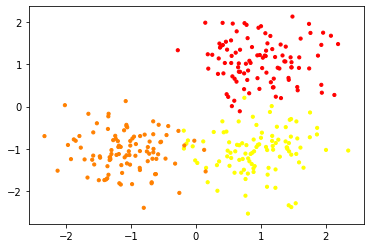

In [20]:
plt.scatter(X[:,0] , X[:,1], c=labels, cmap="autumn", s=10)

In [57]:
af=AffinityPropagation(preference=-50).fit(X)
cluster_center_ids =af.cluster_centers_indices_ 
#labels= af.labels_
n_clust=len(cluster_center_ids)
n_clust

3

Numero estimado de clusters: 3 
Homogeneidad:  0.872
Completitud: 0.872
V Measure 0.872
R2 Ajustado : 0.912
Información mutua ajustada 0.871
Coeficiente de la silueta  0.735 


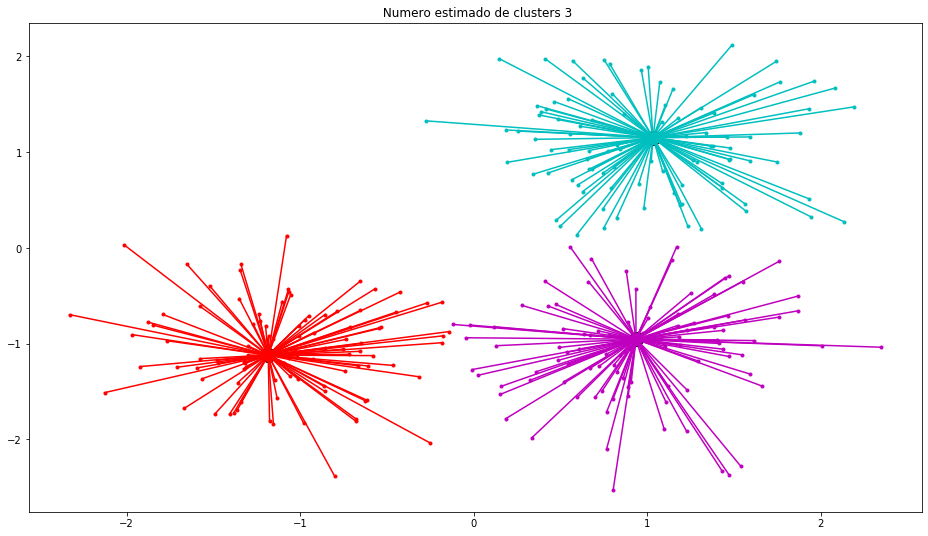

In [60]:
# Que devuelve el algoritmo
def reporte_af(X):
    af=AffinityPropagation(preference=-50).fit(X)
    cluster_center_ids =af.cluster_centers_indices_ 
    AFlabels= af.labels_
    n_clust=len(cluster_center_ids)
    
    print("Numero estimado de clusters: %d "%n_clust)
    print("Homogeneidad:  %0.3f"%metrics.homogeneity_score(labels, AFlabels))
    print("Completitud: %0.3f"%metrics.completeness_score(labels,AFlabels))
    print("V Measure %0.3f"%metrics.v_measure_score(labels,AFlabels))
    print("R2 Ajustado : %0.3f"%metrics.adjusted_rand_score(labels,AFlabels))
    print("Información mutua ajustada %0.3f"%metrics.adjusted_mutual_info_score(labels,AFlabels))
    print("Coeficiente de la silueta  %0.3f "%metrics.silhouette_score(X,labels, metric="sqeuclidean"))
    plt.figure(figsize=(16,9))
    plt.clf()
    colors=cycle("cmrkcmrkcmrkcmrk")
    for k, col in zip(range(n_clust), colors):
        class_members=(AFlabels==k)
        clust_center= X[cluster_center_ids[k]]
        plt.plot(X[class_members,0], X[class_members,1], col+'.')
        plt.plot(clust_center[0],clust_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
        for x in X[class_members]:
            plt.plot([clust_center[0], x[0]], [clust_center[1], x[1]], col)
    plt.title(" Numero estimado de clusters %d"%n_clust)

reporte_af(X)